In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/kc_data.csv")

In [ ]:
print(df.describe())

                 id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   4.580302e+09      3.370842      2.114757   2079.899736  1.510697e+04   
std    2.876566e+09      0.930062      0.770163    918.440897  4.142051e+04   
min    1.000102e+06      0.000000      0.000000    290.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1427.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068800e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

<ipython-input-16-269f288e728f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


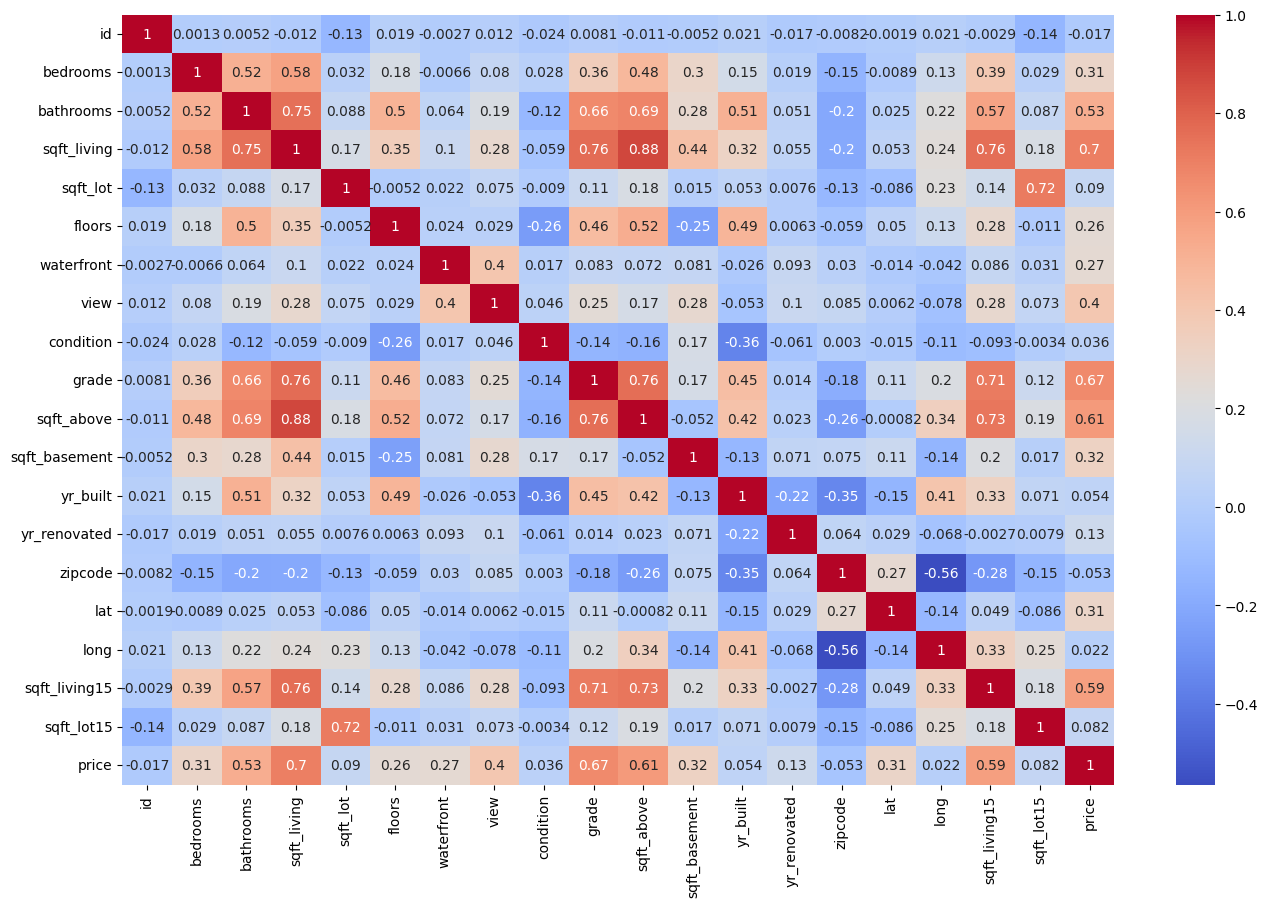

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
columns_to_drop = ['id', 'sqft_living', 'waterfront', 'condition','lat','long','zipcode','yr_renovated']
df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
columns_to_drop = ['date']
df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
df["sqft_above"].fillna(df["sqft_above"].mean(),inplace=True)

In [ ]:
feature_names = df.columns.tolist()
feature_names.remove('price')
X = df[feature_names]
y = df['price']

In [ ]:
# for i in X.columns:
#     X = X - X.mean(axis=0)
#     X[i] = X[i]/np.max(np.abs(X[i]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
random_forest = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 52811237391.54193
R-squared: 0.651076337475571


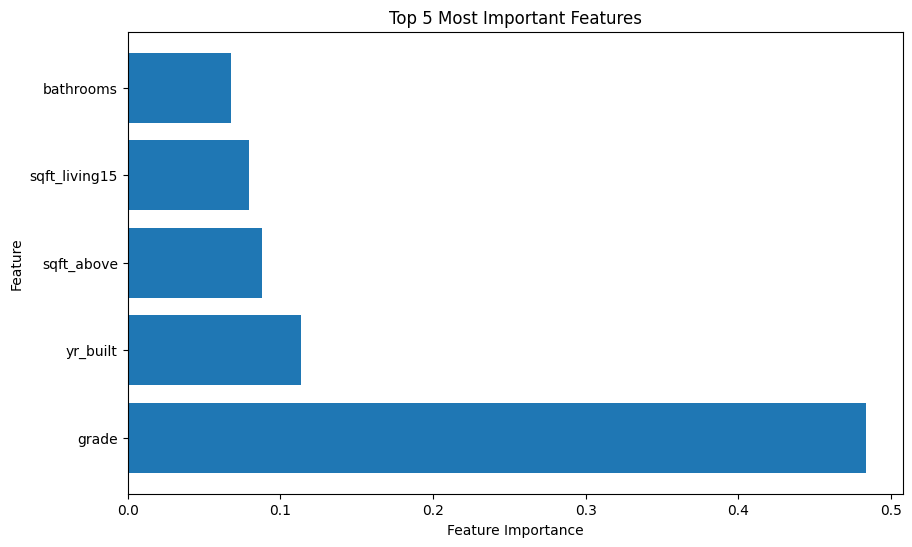

In [ ]:
# Get the feature importances from the best_model
feature_importances = best_model.feature_importances_

# Get the top 5 most important features
top_5_indices = np.argsort(feature_importances)[::-1][:5]
top_5_importances = feature_importances[top_5_indices]
top_5_feature_names = X.columns[top_5_indices]

# Visualize the top 5 most important features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_5_feature_names)), top_5_importances, align='center')
plt.yticks(range(len(top_5_feature_names)), top_5_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Features')
plt.show()


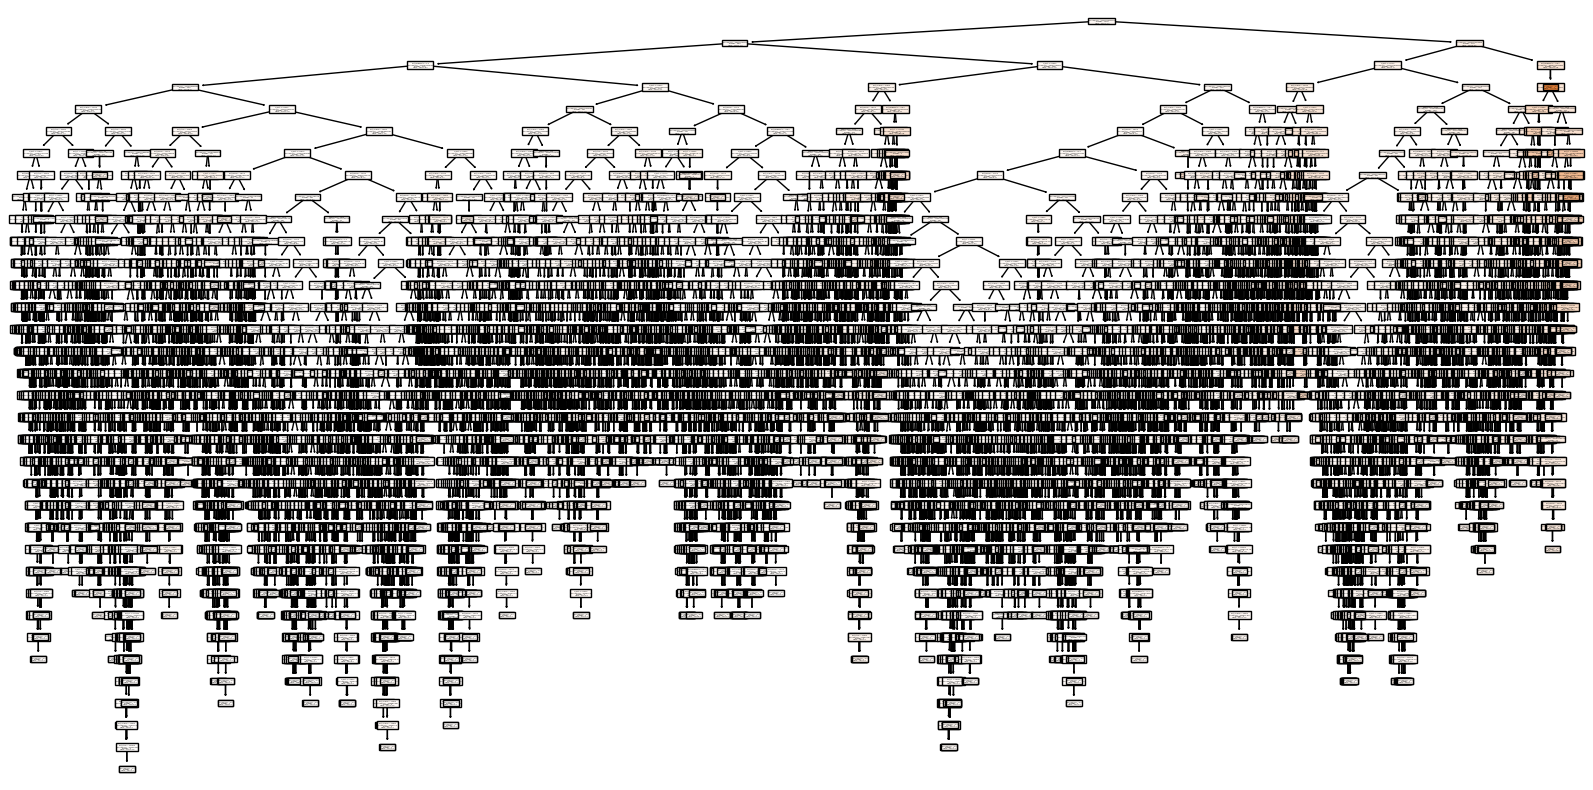

In [ ]:
from sklearn.tree import plot_tree

tree = best_model.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns)
plt.show()
